In [131]:
import json
import numpy as np
import matplotlib.pyplot as plt


def file_to_json(filename):
  with open(filename) as json_file: 
      data = json.load(json_file) 
  return data

In [132]:
dlib_annotated = file_to_json('/content/dlib_annotation.json')
faces_annotated = file_to_json('/content/faces_annotated.json')
mtcnn_annotated = file_to_json('/content/mtcnn_annotated.json')
retinanet_annotated = file_to_json('/content/retinanet_annotated.json')
violajones_annotated = file_to_json('/content/violajones_annotations.json')

In [133]:
print(faces_annotated['0'])
print(dlib_annotated['0'])
print(mtcnn_annotated['0'])
print(retinanet_annotated['0'])
print(violajones_annotated)





{'bounding_box': {'x': 170.0, 'y': 110.0, 'w': 346.0, 'h': 467.0}, 'landmarks': {'left_eye': [256.0, 284.0], 'right_eye': [418.0, 278.0], 'nose': [344.0, 354.0], 'left_mouth': [274.0, 442.0], 'right_mouth': [428.0, 430.0]}}
{'bounding_box': {'x': 161.0, 'y': 162.0, 'w': 385.0, 'h': 385.0}, 'landmarks': {'left_eye': [263.5, 286.5], 'right_eye': [419.5, 284.0], 'nose': [345.0, 351.0], 'left_mouth': [272.0, 437.0], 'right_mouth': [433.0, 433.0]}}
{'bounding_box': {'x': 170.14173889160156, 'y': 126.57473754882812, 'w': 336.31398010253906, 'h': 441.5251159667969}, 'landmarks': {'left_eye': [266.2254333496094, 286.10211181640625], 'right_eye': [420.248291015625, 276.8558044433594], 'nose': [349.02117919921875, 360.152099609375], 'left_mouth': [272.14263916015625, 444.69512939453125], 'right_mouth': [429.95330810546875, 440.2620849609375]}}
{'bounding_box': {'x': 169.0, 'y': 104.0, 'w': 340.0, 'h': 477.0}, 'landmarks': {'left_eye': [262, 283], 'right_eye': [421, 277], 'nose': [347, 345], 'lef

In [ ]:
def compare(groundtruth,algorithm):
  difference = {}
  for id in range(48):
    id=str(id)
    alg = (algorithm[id]["landmarks"])
    ground = (groundtruth[id]["landmarks"])
    norm_factor =(np.linalg.norm(np.array(alg["right_eye"])-np.array(ground["left_eye"])))

    dist_left_eye = (np.linalg.norm(np.array(alg["left_eye"])-np.array(ground["left_eye"])))/ norm_factor
    dist_right_eye = (np.linalg.norm(np.array(alg["right_eye"])-np.array(ground["right_eye"])))/ norm_factor
    dist_nose = (np.linalg.norm(np.array(alg["nose"])-np.array(ground["nose"])))/ norm_factor
    dist_left_mouth = (np.linalg.norm(np.array(alg["left_mouth"])-np.array(ground["left_mouth"])))/ norm_factor
    dist_right_mouth = (np.linalg.norm(np.array(alg["right_mouth"])-np.array(ground["right_mouth"])))/ norm_factor

    # print("ID:",id)
    # print("left_eye_distance:",dist_left_eye,"\tright_eye_distance:",dist_right_eye)
    # print("nose_distance:",dist_nose)
    # print("left_mouth_distance:",dist_left_mouth,"\tright_mouth_distance:",dist_right_mouth)
    # print("")
    difference[id] = {"left_eye_distance":dist_left_eye*100, "right_eye_distance":dist_right_eye*100,"nose_distance":dist_nose*100,"left_mouth_distance":dist_left_mouth*100,"right_mouth_distance":dist_right_mouth*100}
  return difference






In [ ]:
dlib_diff = compare(faces_annotated,dlib_annotated)
mtcnn_diff = compare(faces_annotated,mtcnn_annotated)
retinaface_diff = compare(faces_annotated,retinanet_annotated)


ID: 0
left_eye_distance: 0.04835286942153485 	right_eye_distance: 0.037826657115758354
nose_distance: 0.019341147768613943
left_mouth_distance: 0.032936787811220204 	right_mouth_distance: 0.035663314341561475

ID: 1
left_eye_distance: 0.05601156237936517 	right_eye_distance: 0.028967192633765078
nose_distance: 0.031436782137181506
left_mouth_distance: 0.06922559738741235 	right_mouth_distance: 0.027310531124363057

ID: 2
left_eye_distance: 0.037992998906898896 	right_eye_distance: 0.027822644376367296
nose_distance: 0.07453390223146539
left_mouth_distance: 0.04866039341544362 	right_mouth_distance: 0.03817235316376137

ID: 3
left_eye_distance: 0.0513967348291925 	right_eye_distance: 0.032917498859257405
nose_distance: 0.015967332320925547
left_mouth_distance: 0.05049313829094738 	right_mouth_distance: 0.05322444106975182

ID: 4
left_eye_distance: 0.06771398081007134 	right_eye_distance: 0.06293732423402003
nose_distance: 0.0402091815169182
left_mouth_distance: 0.06513390977175781 	righ

In [ ]:
def average(start,end,difference):
  left_eye=0
  right_eye=0
  nose=0
  left_mouth=0
  right_mouth=0

  for x in range (start,end):

    #print(x)
    x = str(x)
    left_eye+=difference[x]["left_eye_distance"]
    right_eye+=difference[x]["right_eye_distance"]
    nose+=difference[x]["nose_distance"]
    left_mouth+=difference[x]["left_mouth_distance"]
    right_mouth+=difference[x]["right_mouth_distance"]

  print("photos:",start,"-", end)
  print("left_eye_distance:",left_eye/12,"\tright_eye_distance:",right_eye/12)
  print("nose_distance:",nose/12)
  print("left_mouth_distance:",left_mouth/12,"\tright_mouth_distance:",right_mouth/12)
  print("")

  




In [ ]:
average(0,12,dlib_diff)
average(12,24,dlib_diff)
print("")
average(0,12,mtcnn_diff)
average(12,24,mtcnn_diff)
print("")
average(0,12,retinaface_diff)
average(12,24,retinaface_diff)

photos: 0 - 12
left_eye_distance: 0.047694582928812956 	right_eye_distance: 0.037521224162312655
nose_distance: 0.040252033863665514
left_mouth_distance: 0.04019988091163353 	right_mouth_distance: 0.040420141544641956

photos: 12 - 24
left_eye_distance: 0.04953793888649958 	right_eye_distance: 0.049718749881012825
nose_distance: 0.03909461565661447
left_mouth_distance: 0.027270205970294975 	right_mouth_distance: 0.03993097550001111


photos: 0 - 12
left_eye_distance: 0.04052910945500237 	right_eye_distance: 0.038072045150541196
nose_distance: 0.05392656122188686
left_mouth_distance: 0.04201575697868438 	right_mouth_distance: 0.04324951367596355

photos: 12 - 24
left_eye_distance: 0.03160741438909737 	right_eye_distance: 0.03477480354131445
nose_distance: 0.05381082284563995
left_mouth_distance: 0.03400240714529153 	right_mouth_distance: 0.03909892101585607


photos: 0 - 12
left_eye_distance: 0.15710560983769525 	right_eye_distance: 0.07355064523006709
nose_distance: 0.14261885597363352

In [ ]:
        
        # bl = [x,y]
        # br = [x+w,y]
        # tl = [x,y+h]
        # tr = [x+w,y+h]


In [ ]:

import cv2
from google.colab.patches import cv2_imshow
def show_face_comparison(id):
  if (id>=0 and id<24):
    gender = "m"
  else:
    gender="f"
  
  if (id>=0 and id<12 or id>24 and id<36):
    represented = "m"
  else:
    represented = "r"

  file_id=str(id)
  id = str(id)
  if (len(file_id)<2):
    file_id = "0"+file_id
  
  
  image = cv2.imread("/content/dataset/"+file_id+"_"+gender+"_"+represented+".jpg")
  
  x = int(faces_annotated[id]["bounding_box"]["x"])
  y = int(faces_annotated[id]["bounding_box"]["y"])
  w = int(faces_annotated[id]["bounding_box"]["w"])
  h = int(faces_annotated[id]["bounding_box"]["h"])

  print(x,y,w,h)

  landmarks = faces_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

  #-------------------------------------------------------------------------------

  x = int(dlib_annotated[id]["bounding_box"]["x"])
  y = int(dlib_annotated[id]["bounding_box"]["y"])
  w = int(dlib_annotated[id]["bounding_box"]["w"])
  h = int(dlib_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = dlib_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
    
  #-------------------------------------------------------------------------------

  x = int(retinanet_annotated[id]["bounding_box"]["x"])
  y = int(retinanet_annotated[id]["bounding_box"]["y"])
  w = int(retinanet_annotated[id]["bounding_box"]["w"])
  h = int(retinanet_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = retinanet_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (255, 0, 0), -1)

  #-------------------------------------------------------------------------------

  x = int(mtcnn_annotated[id]["bounding_box"]["x"])
  y = int(mtcnn_annotated[id]["bounding_box"]["y"])
  w = int(mtcnn_annotated[id]["bounding_box"]["w"])
  h = int(mtcnn_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = mtcnn_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (255, 255, 0), -1)

  #-------------------------------------------------------------------------------


  img = np.zeros((64,128,3), np.uint8)


  font                   = cv2.FONT_HERSHEY_SIMPLEX
  bottomLeftCornerOfText = (10,10)
  fontScale              = 0.35
  fontColor              = (255,255,255)
  lineType               = 0

  cv2.putText(img,'GroundTruth:', (10,10), font, fontScale,fontColor,lineType)
  cv2.putText(img,'MTCNN:', (10,25), font, fontScale,fontColor,lineType)
  cv2.putText(img,'DLIB:', (10,40), font, fontScale,fontColor,lineType)
  cv2.putText(img,'RetinaFace:', (10,55), font, fontScale,fontColor,lineType)

  cv2.circle(img, (90, 6), 4, (0, 255, 0), -1)
  cv2.circle(img, (90, 21), 4, (255, 255, 0), -1)
  cv2.circle(img, (90, 36), 4, (0, 0, 255), -1)
  cv2.circle(img, (90, 51), 4, (255, 0, 0), -1)

  # cv2_imshow(img)
  # cv2_imshow(image)
  s_img = img
  l_img = image

  l_img[0:s_img.shape[0], 0:s_img.shape[1]] = s_img
  cv2_imshow(l_img)


223 309 469 494
245 348 462 463
250 226 426 587
257 231 428 571


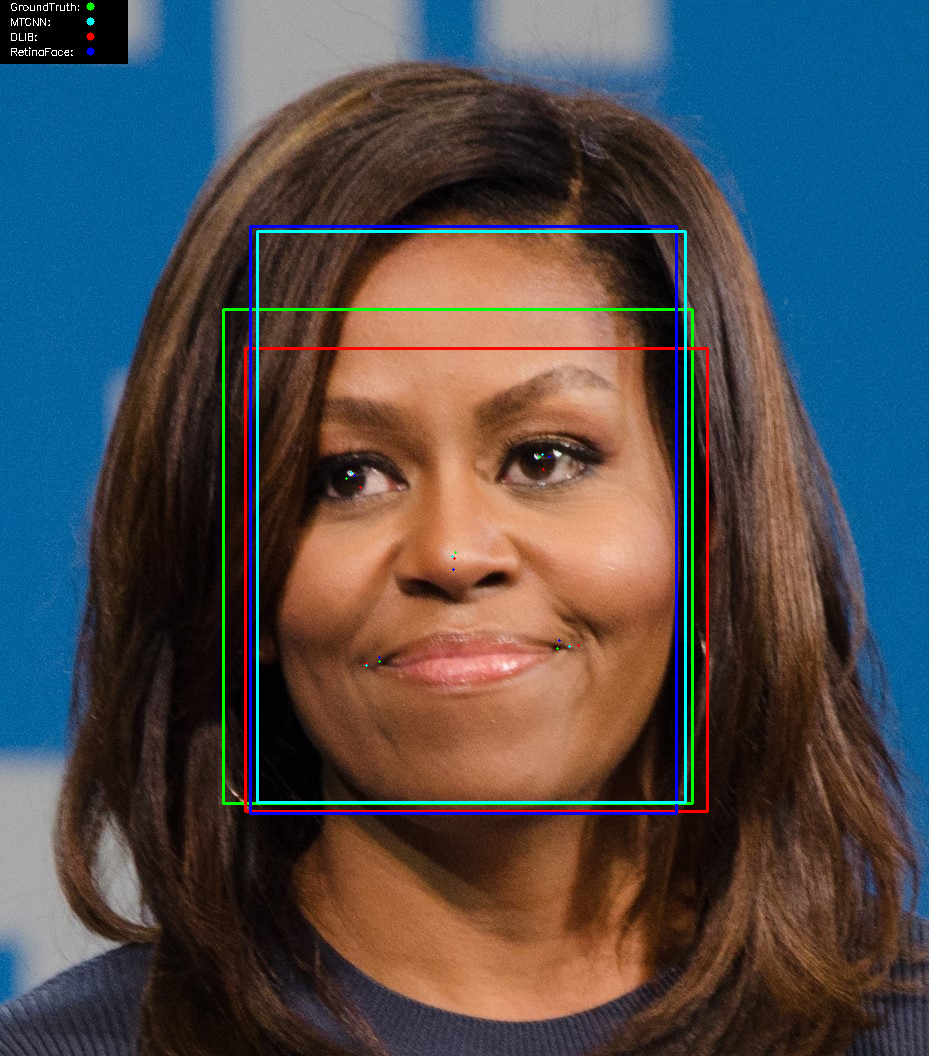

In [ ]:
show_face_comparison(27)

In [177]:
def show_face_comparison_viola(id):
  if (id>=0 and id<24):
    gender = "m"
  else:
    gender="f"
  
  if (id>=0 and id<12 or id>=24 and id<36):
    represented = "m"
  else:
    represented = "r"

  file_id=str(id)
  id = str(id)
  if (len(file_id)<2):
    file_id = "0"+file_id
  
  
  image = cv2.imread("/content/dataset/"+file_id+"_"+gender+"_"+represented+".jpg")

  for face_id in violajones_annotated[id]:
    box = violajones_annotated[id][face_id]
    x = int(box["x"])
    y = int(box["y"])
    w = int(box["w"])
    h = int(box["h"])
    print(x,y,w,h)

    cv2.rectangle(image, (x, y), (x + w, y + h), (100, 255, 255), 2)
  cv2_imshow(image)




In [178]:
print(violajones_annotated)

{'40': {'0': {'x': 41.0, 'y': 248.0, 'w': 479.0, 'h': 479.0}}, '8': {'0': {'x': 248.0, 'y': 114.0, 'w': 66.0, 'h': 66.0}, '1': {'x': 67.0, 'y': 92.0, 'w': 364.0, 'h': 364.0}}, '39': {'0': {'x': 167.0, 'y': 254.0, 'w': 686.0, 'h': 686.0}}, '30': {'0': {'x': 146.0, 'y': 321.0, 'w': 854.0, 'h': 854.0}}, '44': {'0': {'x': 107.0, 'y': 222.0, 'w': 628.0, 'h': 628.0}}, '31': {'0': {'x': 127.0, 'y': 225.0, 'w': 534.0, 'h': 534.0}, '1': {'x': 404.0, 'y': 920.0, 'w': 100.0, 'h': 100.0}}, '45': {'0': {'x': 167.0, 'y': 101.0, 'w': 314.0, 'h': 314.0}}, '6': {'0': {'x': 121.0, 'y': 504.0, 'w': 1504.0, 'h': 1504.0}}, '46': {'0': {'x': 92.0, 'y': 235.0, 'w': 388.0, 'h': 388.0}}, '42': {'0': {'x': 326.0, 'y': 380.0, 'w': 858.0, 'h': 858.0}}, '5': {'0': {'x': 342.0, 'y': 343.0, 'w': 1172.0, 'h': 1172.0}}, '22': {'0': {'x': 307.0, 'y': 539.0, 'w': 1622.0, 'h': 1622.0}, '1': {'x': 346.0, 'y': 2412.0, 'w': 120.0, 'h': 120.0}, '2': {'x': 361.0, 'y': 2364.0, 'w': 126.0, 'h': 126.0}}, '21': {'0': {'x': 700.0,

248 114 66 66
67 92 364 364


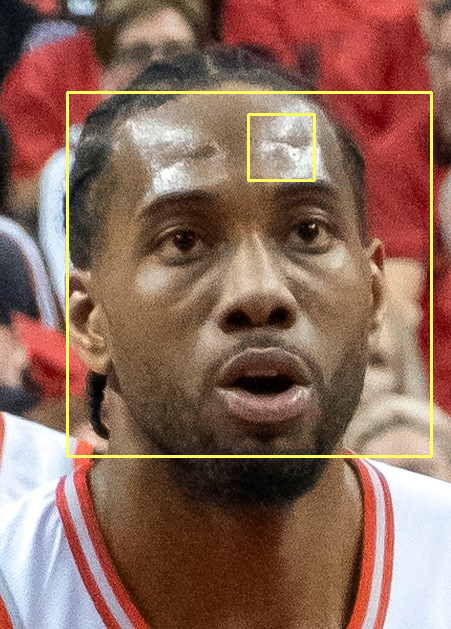

In [179]:
show_face_comparison_viola(8)

In [180]:
dlib_diff = compare(faces_annotated,dlib_annotated)
print(dlib_diff)

{'0': {'left_eye_distance': 4.835286942153485, 'right_eye_distance': 3.7826657115758353, 'nose_distance': 1.9341147768613942, 'left_mouth_distance': 3.2936787811220203, 'right_mouth_distance': 3.5663314341561474}, '1': {'left_eye_distance': 5.601156237936517, 'right_eye_distance': 2.8967192633765078, 'nose_distance': 3.1436782137181507, 'left_mouth_distance': 6.922559738741235, 'right_mouth_distance': 2.7310531124363058}, '2': {'left_eye_distance': 3.79929989068989, 'right_eye_distance': 2.7822644376367296, 'nose_distance': 7.453390223146538, 'left_mouth_distance': 4.866039341544362, 'right_mouth_distance': 3.817235316376137}, '3': {'left_eye_distance': 5.13967348291925, 'right_eye_distance': 3.2917498859257406, 'nose_distance': 1.5967332320925547, 'left_mouth_distance': 5.0493138290947375, 'right_mouth_distance': 5.3224441069751816}, '4': {'left_eye_distance': 6.771398081007134, 'right_eye_distance': 6.293732423402003, 'nose_distance': 4.02091815169182, 'left_mouth_distance': 6.513390

In [181]:
print(dlib_diff)

{'0': {'left_eye_distance': 4.835286942153485, 'right_eye_distance': 3.7826657115758353, 'nose_distance': 1.9341147768613942, 'left_mouth_distance': 3.2936787811220203, 'right_mouth_distance': 3.5663314341561474}, '1': {'left_eye_distance': 5.601156237936517, 'right_eye_distance': 2.8967192633765078, 'nose_distance': 3.1436782137181507, 'left_mouth_distance': 6.922559738741235, 'right_mouth_distance': 2.7310531124363058}, '2': {'left_eye_distance': 3.79929989068989, 'right_eye_distance': 2.7822644376367296, 'nose_distance': 7.453390223146538, 'left_mouth_distance': 4.866039341544362, 'right_mouth_distance': 3.817235316376137}, '3': {'left_eye_distance': 5.13967348291925, 'right_eye_distance': 3.2917498859257406, 'nose_distance': 1.5967332320925547, 'left_mouth_distance': 5.0493138290947375, 'right_mouth_distance': 5.3224441069751816}, '4': {'left_eye_distance': 6.771398081007134, 'right_eye_distance': 6.293732423402003, 'nose_distance': 4.02091815169182, 'left_mouth_distance': 6.513390

In [275]:
import numpy as np

def count_diff(algorithm,threshold):
  # bucket_left_eye = {}
  # bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,100]
  l={"left_eye_distance":[],
     "right_eye_distance":[],
     "nose_distance":[],
     "left_mouth_distance":[],
     "right_mouth_distance":[]
     }
  m_count = 0
  r_count = 0
  for id in algorithm:
    face = (algorithm[id])
    for feature in face:
      value = face[feature]
      if value >= threshold:
        l[feature].append(value)
        id = int(id)
        if (id>=0 and id<12 or id>=24 and id<36):
          m_count += 1
          
        else:
          r_count += 1
      # else:
      #   continue:
      #    #print(id, value, feature)
          
  return m_count,r_count,l



      

In [324]:
miniority_count, represented_count,dlib_error_list = count_diff(dlib_diff,0)
print("DLIB",miniority_count, represented_count,miniority_count-represented_count)

miniority_count, represented_count,mtcnn_error_list = count_diff(mtcnn_diff,0)
print("MTCNN",miniority_count, represented_count,miniority_count-represented_count)

miniority_count, represented_count,retinaface_error_list = count_diff(retinaface_diff,0)
print("RetinaFace",miniority_count, represented_count,miniority_count-represented_count)

DLIB 120 120 0
MTCNN 120 120 0
RetinaFace 120 120 0


In [294]:
# def histogram(listforfeature):
#   bins = [0,1,2,3,4,5,6,7,8,9,10]
#   temp = {}
#   for x in bins:
#     temp[x]=0
#   temp[11] = 0
#   #print(dict_hist)
#   for x in listforfeature:
#     if x>10:
#       temp[11]+=1
#     else:
#       x = int(x)+1
#       temp[x]+=1
#   return temp





In [302]:
# dict_hist = histogram(l["right_eye_distance"])

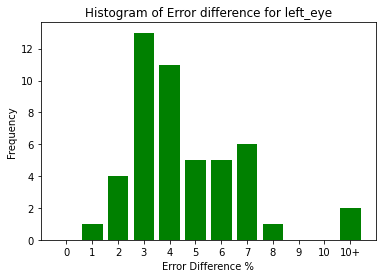

{0: 0, 1: 1, 2: 4, 3: 13, 4: 11, 5: 5, 6: 5, 7: 6, 8: 1, 9: 0, 10: 0, 11: 2}


In [303]:
import matplotlib.pyplot as plt
xval=[]
yval=[]
for x in dict_hist:
  
  xval.append(x) 
  yval.append(dict_hist[x])


plt.title('Histogram of Error difference for left_eye')
plt.xlabel('Error Difference %')
plt.ylabel('Frequency')
plt.bar(xval, yval, color='g')
plt.xticks(list(dict_hist.keys()),["0","1","2","3","4","5","6","7","8","9","10","10+"])
plt.show()
print(dict_hist)

In [335]:
def histogram(listforfeature, nameofhistogram):
  import numpy as np
  import matplotlib.pyplot as plt
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20,10))

  left_eye_distance = (listforfeature["left_eye_distance"])
  right_eye_distance = (listforfeature["right_eye_distance"])
  nose_distance = (listforfeature["nose_distance"])
  left_mouth_distance = (listforfeature["left_mouth_distance"])
  right_mouth_distance = (listforfeature["right_mouth_distance"])

  bins = np.linspace(0, 15, 16)
  #print(bins)

  plt.hist([left_eye_distance,right_eye_distance,nose_distance,left_mouth_distance,right_mouth_distance], bins, label=['left_eye_distance', 'left_eye_distance','nose_distance','left_mouth_distance','right_mouth_distance'])
  plt.xticks(bins)
  title = "Histogram of Error difference for " + nameofhistogram
  plt.title(title)
  plt.xlabel('Error Difference %')
  plt.ylabel('Frequency')
  plt.legend(loc='upper right',prop={'size': 28})
  plt.show()

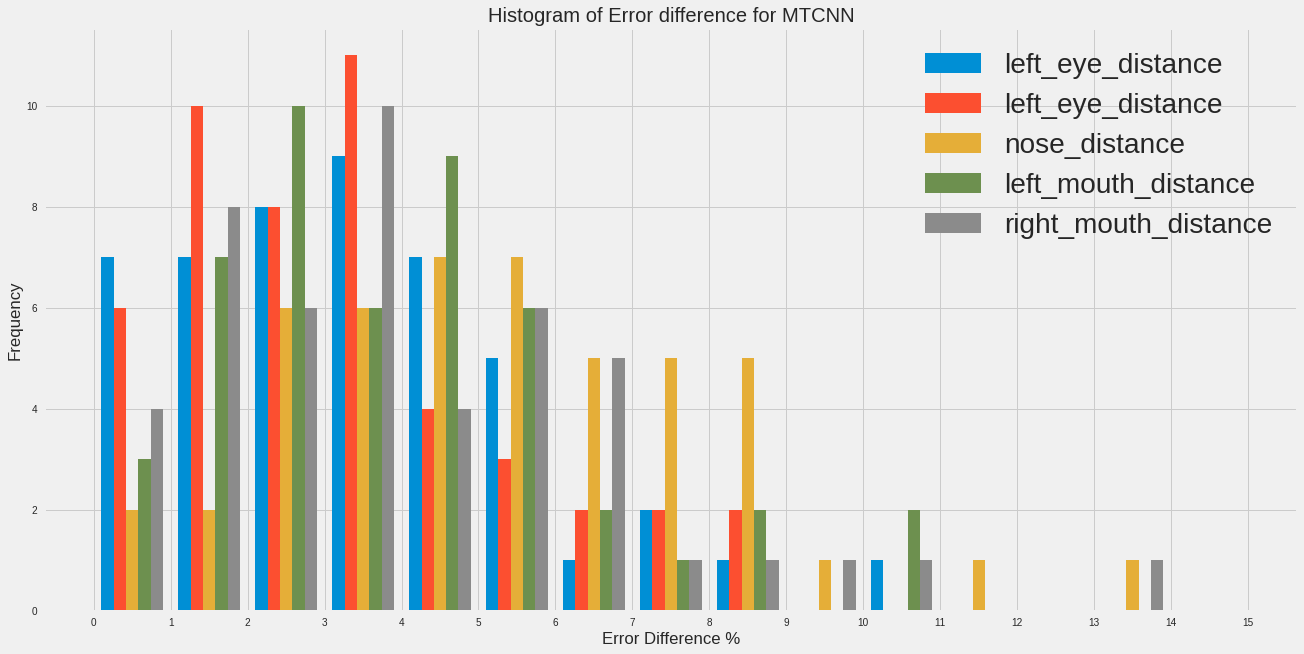

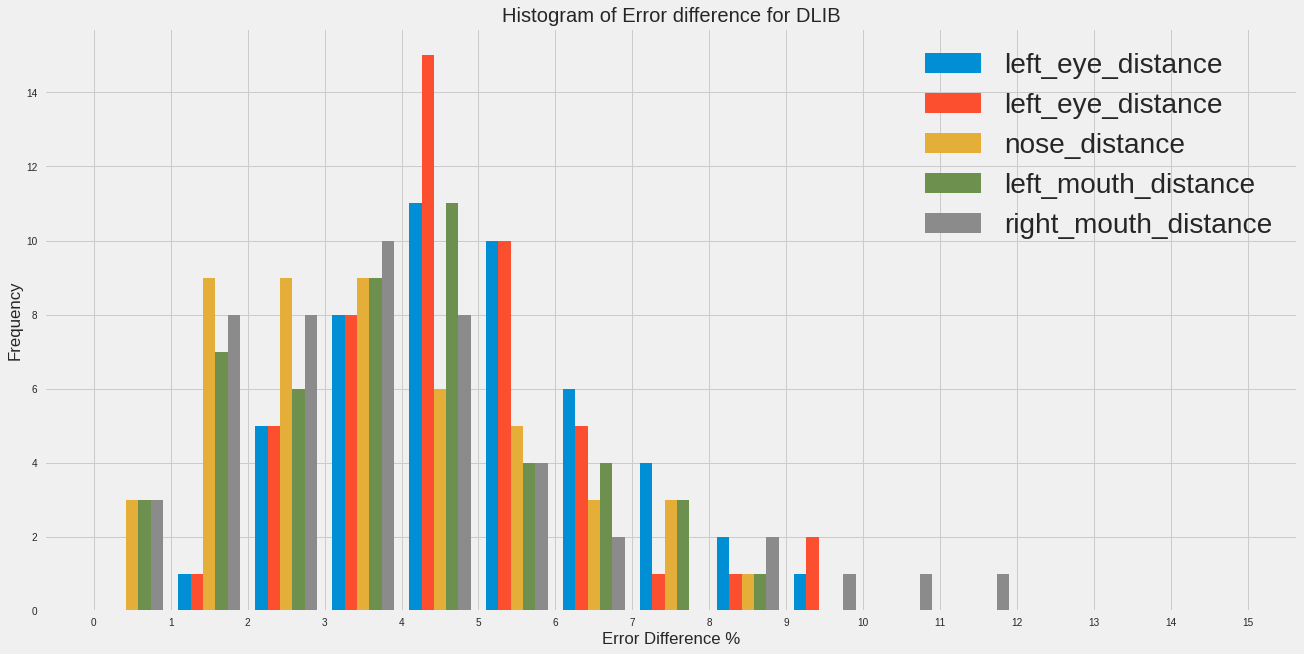

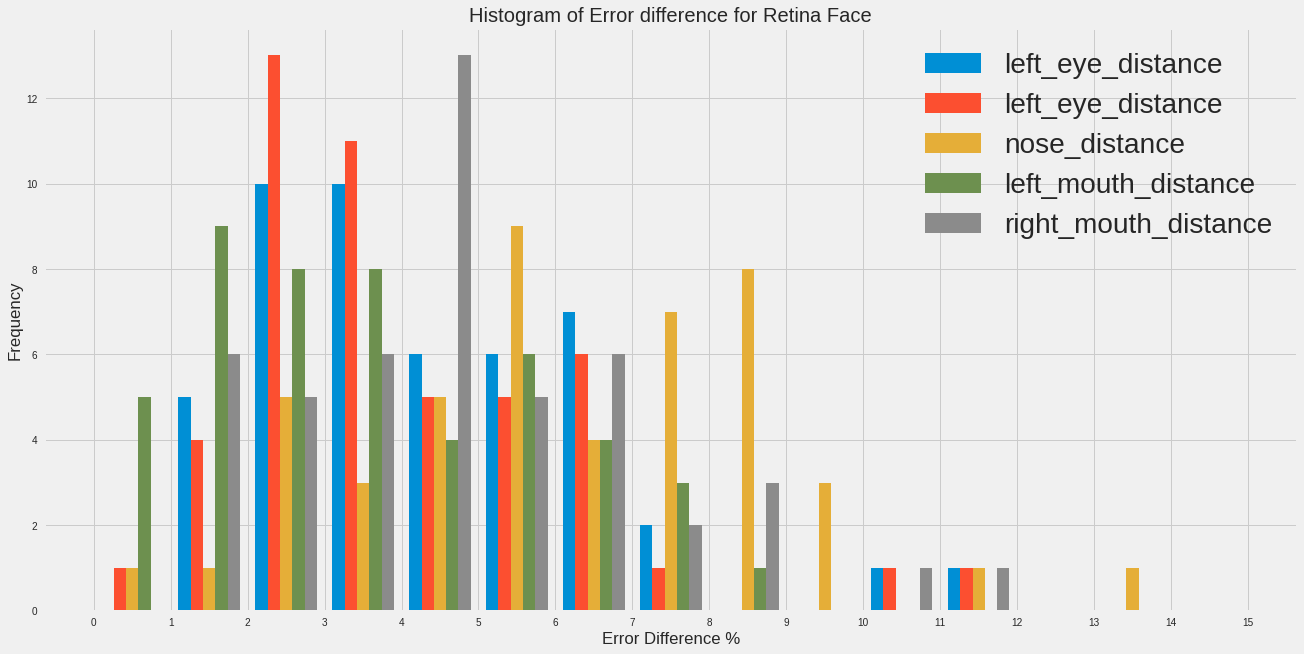

In [336]:
histogram(mtcnn_error_list,"MTCNN")
histogram(dlib_error_list,"DLIB")
histogram(retinaface_error_list,"Retina Face")

In [ ]:
# 3 10.002711129235117 right_mouth_distance
# 4 12.40886824893235 left_eye_distance
# 5 19.31305185279428 left_eye_distance
# 5 20.935905121150007 nose_distance
# 5 28.100861301642922 left_mouth_distance
# 5 14.678515175915832 right_mouth_distance
# 6 115.42289394955829 left_eye_distance
# 6 20.52432548026405 right_eye_distance
# 6 90.08818955596294 nose_distance
# 6 143.6449560367167 left_mouth_distance
# 6 100.52528984405266 right_mouth_distance
# 7 20.520769145576516 left_mouth_distance
# 7 14.54703286593638 right_mouth_distance
# 9 12.031880442944837 right_eye_distance
# 13 35.39949977054885 left_eye_distance
# 13 17.95667782177116 nose_distance
# 13 54.297008988603515 left_mouth_distance
# 13 41.62285014884796 right_mouth_distance
# 15 17.261841485525853 left_mouth_distance
# 15 13.78667791451879 right_mouth_distance
# 16 11.376395435159582 right_mouth_distance
# 18 17.06535890328727 right_mouth_distance
# 20 10.827319825607505 right_mouth_distance
# 22 79.19486714821298 left_eye_distance
# 22 52.64922394477324 right_eye_distance
# 22 97.11471480044828 left_mouth_distance
# 22 32.377112212363194 right_mouth_distance
# 29 12.253229903151661 right_mouth_distance
# 32 18.659485774821153 left_eye_distance
# 32 19.026212051206503 right_eye_distance
# 32 17.630205639842213 nose_distance
# 42 10.360842834846311 left_eye_distance
# RetinaFace 18 14 4